## Atividade 03 - PIC - Parte 1

#### Tema: Modelagem de Sistema de Refrigeração

---

Aluno: Abner Vieira Pereira

## Enunciado

Refrigerante-134a entra no compressor de um refrigerador como vapor superaquecido a 0,14 MPa e -10°C com uma vazão de 0,05 kg/s e sai a 0,8 MPa e 50°C. O refrigerante é resfriado no condensador até 26°C e 0,72 MPa e é expandido para 0,15 MPa. Desconsiderando qualquer transferência de calor e quedas de pressão nas linhas de conexão entre os componentes, determine:

(a) a taxa de remoção de calor do espaço refrigerado e a potência de entrada no compressor,
(b) a eficiência isentrópica do compressor, e
(c) o coeficiente de performance do refrigerador.

In [2]:
from numpy import *
import numpy as np
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt
from pandas import *
import pandas as pd
from IPython.display import Math


## Estado 1

In [ ]:
P1 = 0.14e6            #Pa
T1 = (-10 + 273.15)    #K
fluido_ref = 'R134a'

In [4]:
h1 = CP.PropsSI('H','T',T1,'P',P1,fluido_ref)
h1_conv = h1/1000
display(Math(r'h_{1} = %.3f kJ/kg'%h1_conv))

<IPython.core.display.Math object>

In [5]:
s1 = CP.PropsSI('S','T',T1,'P',P1,fluido_ref)
s1_conv = s1/1000
display(Math(r's_{1} = %.3f kJ/kg°C'%s1_conv))

<IPython.core.display.Math object>

## Estado 2

In [6]:
P2 = 0.8e6          #Pa
T2 = (50 + 273.15)     #K

In [7]:
h2 = CP.PropsSI('H','P',P2,'T',T2,fluido_ref)
h2_conv = h2/1000
display(Math(r'h_{2} = %.3f kJ/kg'%h2_conv))

<IPython.core.display.Math object>

In [8]:
h2_s = CP.PropsSI('H','P',P2,'S',s1,fluido_ref)
h2_s_conv = h2_s/1000
display(Math(r'h_{2,s} = %.3f kJ/kg'%h2_s_conv))

<IPython.core.display.Math object>

### Eficiência isentrópica

$$\eta_c = \dfrac{h_{2s} - h_1}{h_2 - h_1}$$

In [9]:
eta_c = (h2_s_conv - h1_conv) / (h2_conv - h1_conv)
eta_c *= 100
display(Math(r'\eta_{c} = %.3f \%% '%eta_c))

<IPython.core.display.Math object>

## Estado 3

In [10]:
T3 = 26 + 273.15
P3 = 0.72e6

In [11]:
h3 = CP.PropsSI('H','P',P3,'T',T3,fluido_ref)
h3_conv = h3/1000
display(Math(r'h_{3} = %.3f kJ/kg \,'%h3_conv))

<IPython.core.display.Math object>

In [12]:
s3 = CP.PropsSI('S','T',T3,'P',P3,fluido_ref)
s3_conv = s3/1000
display(Math(r's_{3} = %.3f kJ/kg \,'%s3_conv))

<IPython.core.display.Math object>

In [13]:
Q3 = CP.PropsSI('Q','P',P3,'H',h3,fluido_ref)
Q3

-1.0

## Estado 4

In [14]:
h4_conv = h3_conv
P4 = 0.15e6

In [15]:
T4 = CP.PropsSI('T','P',P4,'H',h4_conv*10**3,fluido_ref)
T4_C = T4-273.15
display(Math(r'T_{4} = %.3f \, °C'%T4_C))

<IPython.core.display.Math object>

In [16]:
s4 = CP.PropsSI('S','P',P4,'H',h4_conv*10**3,fluido_ref)
s4_conv = s4/1000
display(Math(r's_{4} = %.3f \, kJ/kg°C'%s4_conv))

<IPython.core.display.Math object>

In [17]:
Q4 = CP.PropsSI('Q','P',P4,'H',h4_conv*10**3,fluido_ref)
display(Math(r'Q_{4} = %.3f \, '%Q4))

<IPython.core.display.Math object>

## Taxa de remoção de calor do espaço refrigerdo

$$\dot{Q}_{evap} = \dot{m}(h_1 - h_4)$$

In [18]:
m_ponto = 0.05     #kg/s
Q_evap = m_ponto * (h1_conv - h4_conv)
display(Math(r'\dot{Q}_{evap} = %.3f kW'%Q_evap))

<IPython.core.display.Math object>

## Potência de entrada do compressor

$$\dot{W} = \dot{m}(h_2 - h_1)$$

In [19]:
W_comp = m_ponto*(h2_conv - h1_conv)
display(Math(r'\dot{W}_{comp} = %.3f kW'%W_comp))

<IPython.core.display.Math object>

## Taxa de liberação de calor pelo condensador

$$\dot{Q}_{cond} = \dot{m}(h_2 - h_3)$$

In [20]:
Q_cond = m_ponto * (h2_conv - h3_conv)
display(Math(r'\dot{Q}_{cond} = %.3f kW'%Q_cond))

<IPython.core.display.Math object>

## COP

$$COP = \dfrac{\dot{Q}_{evap}}{\dot{W}_{comp}}$$

In [21]:
COP = Q_evap/W_comp
display(Math(r'COP = %.3f \,'%COP))

<IPython.core.display.Math object>

## Plotando gráfico P-h

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5784\239365721.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([h1_conv,h2_conv,h3_conv,h4_conv,h1_conv],


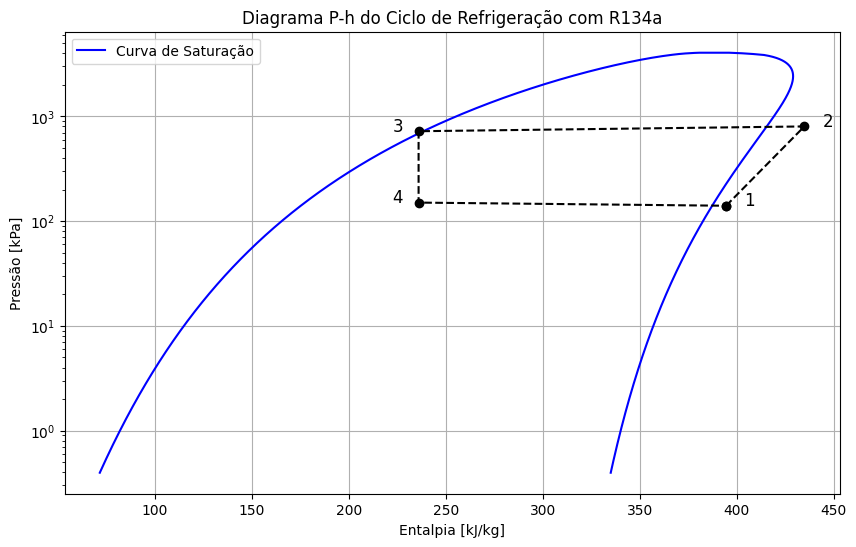

In [22]:
# Definindo os limites de temperatura, incluindo a temperatura crítica
T_min = 170
T_max = 374

T_values = np.linspace(T_min, T_max, 1000)  

h_liq = [CP.PropsSI('H', 'T', T, 'Q', 0, fluido_ref) / 1000 for T in T_values]  
h_vap = [CP.PropsSI('H', 'T', T, 'Q', 1, fluido_ref) / 1000 for T in T_values]  

P_values = [CP.PropsSI('P', 'T', T, 'Q', 0, fluido_ref) / 1e3 for T in T_values]  


h_values = np.concatenate((h_liq, h_vap[::-1]))  # Concatena valores de líquido e vapor
P_values_combined = np.concatenate((P_values, P_values[::-1]))  # Concatena pressão

# Fazendo a plotagem da curva de saturação
plt.figure(figsize=(10,6))
plt.plot(h_values, P_values_combined, label='Curva de Saturação', color='blue')

plt.plot([h1_conv,h2_conv,h3_conv,h4_conv,h1_conv],
         [P1/1e3, P2/1e3, P3/1e3, P4/1e3, P1/1e3],
         'k--',marker='o',color='black')

# Adicionando enumeração nos pontos do ciclo
plt.text(h1_conv + 15, P1 / 1e3, '1', fontsize=12, ha='right', color='black')
plt.text(h2_conv + 15, P2 / 1e3, '2', fontsize=12, ha='right', color='black')
plt.text(h3_conv - 8, P3 / 1e3, '3', fontsize=12, ha='right', color='black')
plt.text(h4_conv - 8, P4 / 1e3, '4', fontsize=12, ha='right', color='black')

# Configurações do gráfico
plt.title('Diagrama P-h do Ciclo de Refrigeração com R134a')
plt.xlabel('Entalpia [kJ/kg]')
plt.ylabel('Pressão [kPa]')
plt.yscale('log')  # Escala logarítmica para a pressão
plt.grid(True)
plt.legend()
plt.show()

In [23]:
results = {
    'Q_evap [kW]':[round(Q_evap,3)],
    'W_comp [kW]':[round(W_comp,3)],
    '[η_c%]':[round(eta_c,3)],
    'COP':[round(COP,3)]
}

results = pd.DataFrame(results)
display(results)

,Q_evap [kW],W_comp [kW],[η_c%],COP
0,7.926,2.017,93.737,3.93
